In [32]:
import random
import os


import random

def generate_data(nodes_number, x_range, y_range, seed):
    if seed is not None:
        random.seed(seed)

    data = []
    used_coordinates = set()

    while len(data) < nodes_number:
        x = random.randint(x_range[0], x_range[1])
        y = random.randint(y_range[0], y_range[1])
        
        if (x, y) not in used_coordinates:
            used_coordinates.add((x, y))
            data.append((len(data) + 1, x, y))
    return data




# Function to write the generated data to a file
def write_to_file(filename, data):
    with open(filename, "w") as f:
        for entry in data:
            f.write(f"{entry[0]} {entry[1]} {entry[2]}\n")


NODES_NUMBER = 10
X_RANGE = (0, 50)
Y_RANGE = (0, 50)
SEED = 1
data = generate_data(NODES_NUMBER,X_RANGE,Y_RANGE,SEED)


filename = "TSP.txt"
if os.path.exists(filename):
    os.remove(filename)

write_to_file(filename, data)

print(f"Randomly generated '{NODES_NUMBER}' Cities and written to '{filename}'")

Randomly generated '10' Cities and written to 'TSP.txt'


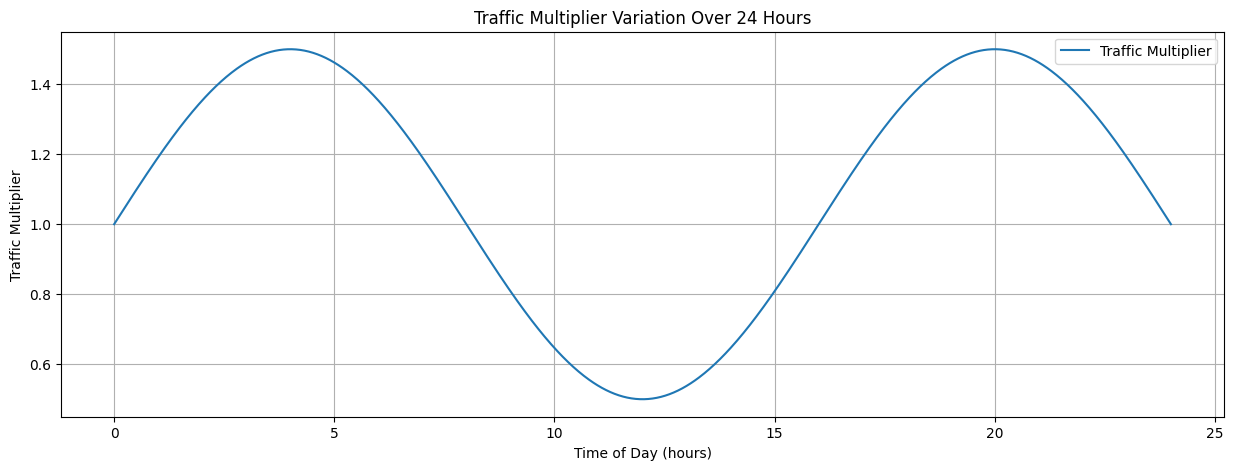

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the sine function representing traffic variations
hours = np.linspace(0, 24, 1000)
TRAFFIC_FUNCTION = 1 + 0.5 * np.sin(hours / 24 * 3 * np.pi)

# Plot the sine function
plt.figure(figsize=(15, 5))
plt.plot(hours, TRAFFIC_FUNCTION, label="Traffic Multiplier")
plt.xlabel("Time of Day (hours)")
plt.ylabel("Traffic Multiplier")
plt.title("Traffic Multiplier Variation Over 24 Hours")
plt.grid(True)
plt.legend()
plt.show()

10 127.29302497520017
20 123.62916477663983
30 123.62916477663983
40 123.62916477663983
50 123.62916477663983
60 123.62916477663983
70 123.62916477663983
80 123.62916477663983
90 123.62916477663983
100 123.62916477663983
110 123.62916477663983
120 123.62916477663983
130 123.62916477663983
140 123.62916477663983
150 123.62916477663983
160 123.62916477663983
170 123.62916477663983
180 123.62916477663983
190 123.62916477663983
200 123.62916477663983
210 123.62916477663983
220 123.62916477663983
230 123.62916477663983
240 123.62916477663983
250 123.62916477663983
260 123.62916477663983
270 123.62916477663983
280 123.62916477663983
290 123.62916477663983
300 123.62916477663983
310 123.62916477663983
320 123.62916477663983
330 123.62916477663983
340 123.62916477663983
350 123.62916477663983
360 123.62916477663983
370 123.62916477663983
380 123.62916477663983
390 123.62916477663983
400 123.62916477663983
410 123.62916477663983
420 123.62916477663983
430 123.62916477663983
440 123.629164776639

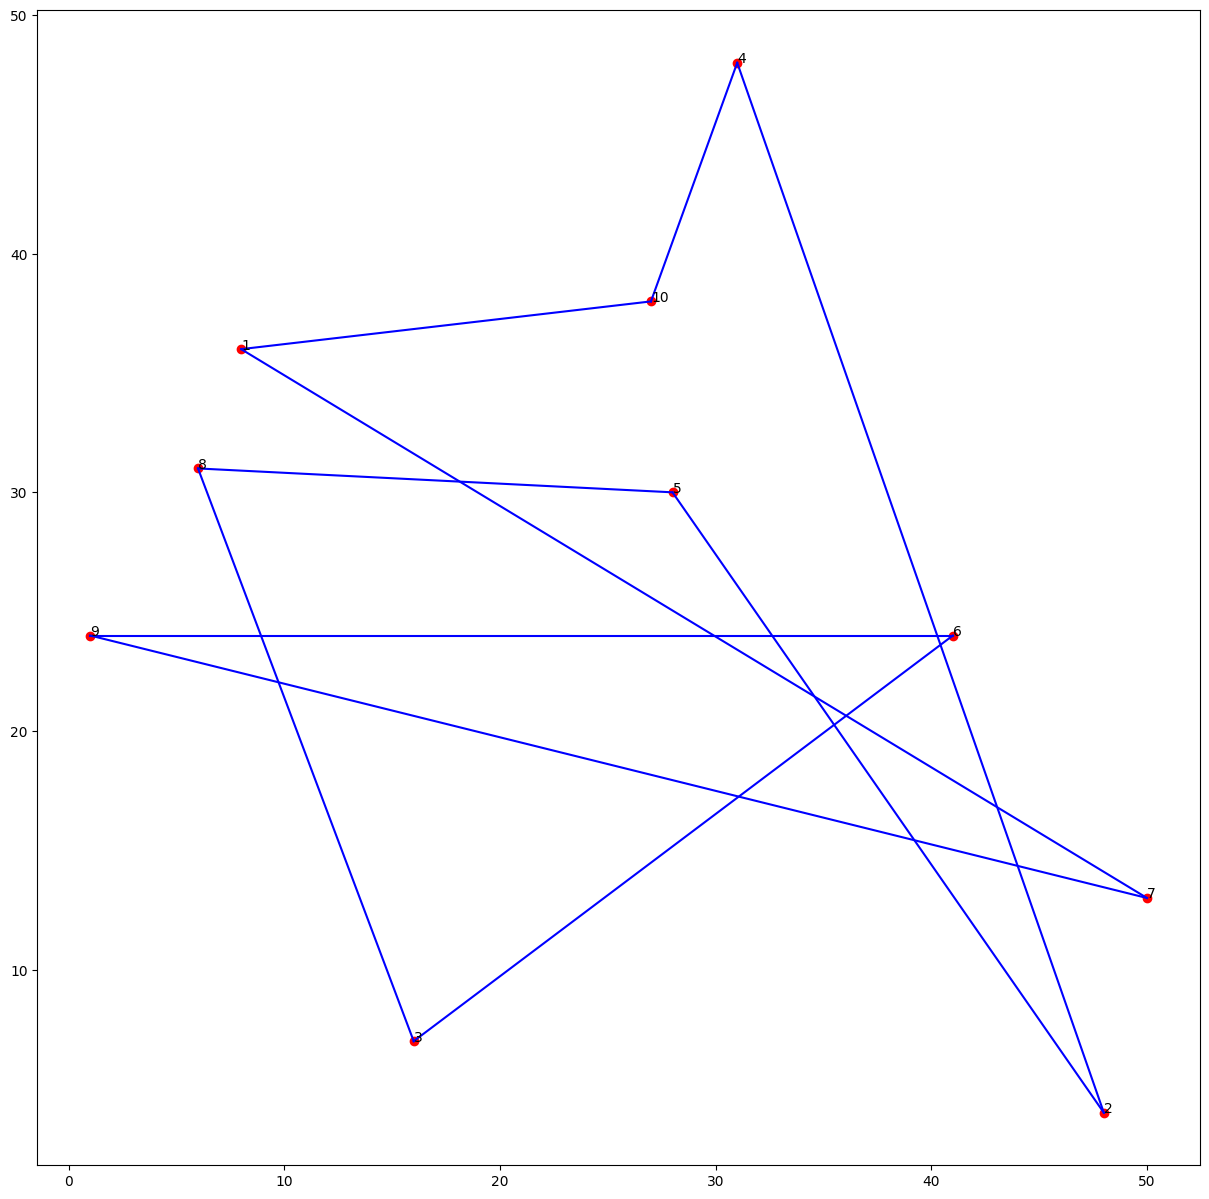

In [34]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


# Function to get cities information from a file
def get_city():
    cities = []
    # Open the file containing city information
    f = open("TSP.txt")
    for i in f.readlines():
        node_city_val = i.split()
        # Append city information to the list
        cities.append(
            [node_city_val[0], float(node_city_val[1]), float(node_city_val[2])]
        )
    return cities


# Function to calculate the travel time based on traffic variations
def calculate_travel_time(cityA, cityB, time):
    base_distance = math.sqrt(
        math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2)
    )
    # Simulate traffic variation with a sine function 
    traffic_multiplier = 1 + 0.5 * np.sin(
        time / 24 * 3 * np.pi
    )  
    travel_time = base_distance * traffic_multiplier
    # print(f"travel_time between {cityA[0]} & {cityB[0]} : {travel_time}")
    return travel_time


# Function to calculate the total distance of the path
def calculate_total_time(cities):
    total_time = 0
    current_time = 0 
    for i in range(len(cities) - 1):
        cityA = cities[i]
        cityB = cities[i + 1]
        # Calculate the travel time between two cities considering the time of day
        travel_time = calculate_travel_time(cityA, cityB, current_time)
        total_time += travel_time
        current_time += travel_time

    # Calculate the time to return to the starting city
    cityA = cities[0]
    cityB = cities[-1]
    travel_time = calculate_travel_time(cityB, cityA, current_time)
    total_time += travel_time
    # print("-----------------------------------")
    # print(f"total_time {total_time}")
    # print("-----------------------------------")
    return total_time


# Function to create the initial population
def select_population(cities, size):
    population = []
    for i in range(size):
        c = cities.copy()
        # Shuffle cities to create a random path
        random.shuffle(c)
        total_time = calculate_total_time(c)
        # Append the path and its total time to the population
        population.append([total_time, c])
    fittest = sorted(population)[0]
    return population, fittest


# Function to perform the genetic algorithm
def genetic_algorithm(
    population,
    lenCities,
    GENERATIONS_NUMBER,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
):
    gen_number = 0
    for i in range(GENERATIONS_NUMBER):
        new_population = []
        # Selecting the two best options (elitism)
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])
        for i in range(int((len(population) - 2) / 2)):
            # Perform crossover based on the crossover rate
            random_number = random.random()
            if random_number < CROSSOVER_RATE:
                parent_chromosome1 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]
                parent_chromosome2 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]
                point = random.randint(0, lenCities - 1)
                # Create child chromosomes by combining parts of parent chromosomes
                child_chromosome1 = parent_chromosome1[1][0:point]
                for j in parent_chromosome2[1]:
                    if j not in child_chromosome1:
                        child_chromosome1.append(j)
                child_chromosome2 = parent_chromosome2[1][0:point]
                for j in parent_chromosome1[1]:
                    if j not in child_chromosome2:
                        child_chromosome2.append(j)
            else:
                child_chromosome1 = random.choices(population)[0][1]
                child_chromosome2 = random.choices(population)[0][1]
            # Perform mutation based on the mutation rate
            if random.random() < MUTATION_RATE:
                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome1[point1], child_chromosome1[point2] = (
                    child_chromosome1[point2],
                    child_chromosome1[point1],
                )
                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome2[point1], child_chromosome2[point2] = (
                    child_chromosome2[point2],
                    child_chromosome2[point1],
                )
            # Add new children to the population
            new_population.append(
                [calculate_total_time(child_chromosome1), child_chromosome1]
            )
            new_population.append(
                [calculate_total_time(child_chromosome2), child_chromosome2]
            )
        population = new_population
        gen_number += 1
        # print(f"Population gen {gen_number} : ", population)
        # Print the best distance every 10 generations
        if gen_number % 10 == 0:
          print(gen_number, sorted(population)[0][0])
    answer = sorted(population)[0]
    print("Answer : ", answer)
    return answer


# Function to draw the cities and the best path found
def drawMap(city, answer):
    plt.figure(figsize=(15,15))
    for j in city:
        # Plot each city
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))
    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            second = answer[1][i + 1]
            # Draw the path between cities
            plt.plot([first[1], second[1]], [first[2], second[2]], "blue")
        except:
            continue
    # Draw the path back to the start to complete the loop
    first = answer[1][0]
    second = answer[1][-1]
    plt.plot([first[1], second[1]], [first[2], second[2]], "blue")
    plt.show()


def main():
    GENERATIONS_NUMBER = 2000
    POPULATION_SIZE = 3000
    TOURNAMENT_SELECTION_SIZE = 5
    MUTATION_RATE = 0.5
    CROSSOVER_RATE = 0.5
    cities = get_city()
    # Select the initial population and the fittest individual
    firstPopulation, firstFittest = select_population(cities, POPULATION_SIZE)
    answer = genetic_algorithm(
        firstPopulation,
        len(cities),
        GENERATIONS_NUMBER,
        TOURNAMENT_SELECTION_SIZE,
        MUTATION_RATE,
        CROSSOVER_RATE,
    )
    print("\n----------------------------------------------------------------")
    print("Initial generation result : " + str(firstFittest[0]))
    print("Best generation result : " + str(answer[0]))
    print("----------------------------------------------------------------\n")
    drawMap(cities, answer)


main()